## Theme: Air Pollution in China

## Title: Effectiveness of "Air Pollution Prevention and Control Action Plan": Comparison between key regions and other regions

### Introduction:
Because of the severse air pollution in the beginning of 2013, China implemented the "Air Pollution Prevention and Control Action Plan" (APPCAP) in sept 2013 in all China with the main focus on 3 key regions: Beijing-Tianjin-Hebei, Yangtze River delta and Pearl River delta. 

In this thesis we want to use the Diff-in-Diffs model to verify if the more intense policy in the 3 key regions help to get better result than the others regions in China. Our hypothese is:

**Ho:** "The more intense policies implemented of key regions are more effective in reducing the air pollution than the less intense policies of others regions"

### Data:
We use the data of 3 pollutant gases (PM10, SO2, NOx) of 30 cities in China, 8 cities in key regions and 20 cities in other regions from 2008 to 2017 to make the comparison.

### Call library

In [35]:
library(tidyverse)
library(lfe)
library(magrittr)
library(lmtest)
library(plm)
library(stargazer)
library(data.table)
library(xtable)

### Import Data:
- import with correct type
- covert character to factor
- choose lvl of reference

In [36]:
url <- paste("https://raw.githubusercontent.com/KubiaPXH/Memoire-M1/",
             "master/data/final_air_pollution_30cities.csv",  sep="")

df_sd <- read.csv(url)

df <- read_csv(url, col_types = cols(
  city = col_character(),
  year = col_character(),
  PM10 = col_double(),
  SO2 = col_double(),
  NOx = col_double(),
  pop_density = col_double(),
  GRP_pc = col_double(),
  second_industry = col_double(),
  green_coveraged = col_double(),
  post = col_character(),
  key_regions = col_character())
) %>% 
  mutate_if(is.character,as.factor) %>%
  mutate(
    post = relevel(post, ref = '0'),
    key_regions = relevel(key_regions, ref = '0'),
    city = relevel(city, ref = 'Kunming'),
    year = relevel(year, ref = '2013')
  ) 

year <- c(2008,2009,2010,2011,2012,2013,2014,2015,2016,2017)

### Draw graph of air pollution

- **Graph of PM10**

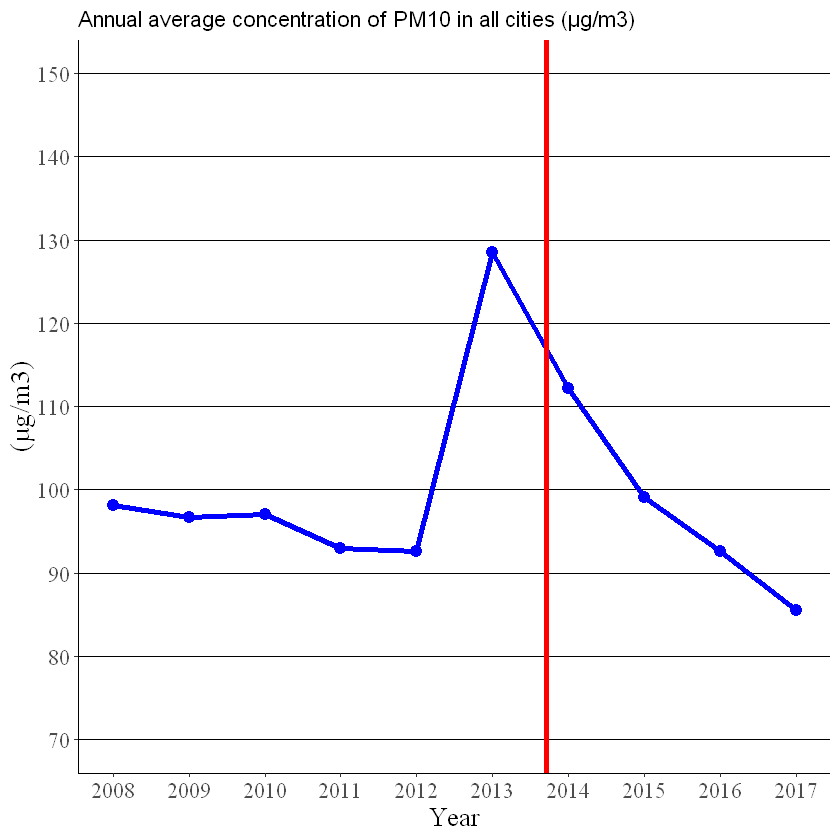

In [37]:
mean_PM10_all <- NULL
for (i in year) {
  subset_year <- subset(df, year == i)
  mean_PM10_all <- c(mean_PM10_all,mean(subset_year$PM10))
}
avg_PM10 <- data.frame(year,mean_PM10_all)
p_PM10 <- ggplot(data = avg_PM10, aes(x = year)) +
  # add title
  ggtitle("Annual average concentration of PM10 in all cities (µg/m3)") +
  # draw line
  geom_line(aes(y = mean_PM10_all), color = "blue", size = 1.5) +
  # draw year point 
  geom_point(aes(x = year, y = mean_PM10_all), color = "blue", size = 3) +
  # scale and breaks
  scale_x_continuous(breaks = seq(2008,2017,1)) +
  scale_y_continuous(breaks = seq(70,150,10), limits = c(70,150)) +
  # modify xlab, y lab, legend
  labs(x = "Year",
       y = "(µg/m3)",
       color = "") +
  # parameter graph
  theme(axis.title = element_text(size = 16, family = "serif"),
        axis.text = element_text(size = 13, family = "serif"),
        axis.line = element_line(color = "black"),
        legend.position = "none",
        panel.grid.major.y = element_line(color = "black"),
        panel.grid.major.x = element_blank(),
        panel.background = element_blank()) +
  # draw line showing the begining of policy
  geom_vline(xintercept = 2013.7, color = "red", size = 1.5)
print(p_PM10)

- **Graph of SO2**

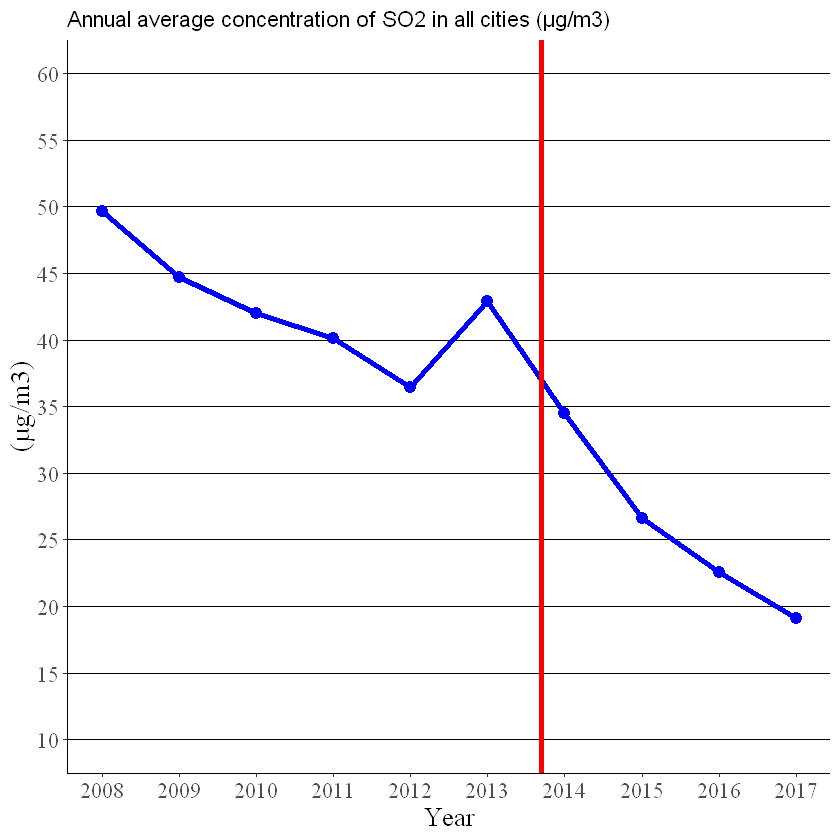

In [38]:
mean_SO2_all <- NULL
for (i in year) {
  subset_year <- subset(df, year == i)
  mean_SO2_all <- c(mean_SO2_all,mean(subset_year$SO2))
}
avg_SO2 <- data.frame(year,mean_SO2_all)
p_SO2 <- ggplot(data = avg_SO2, aes(x = year)) +
  # add title
  ggtitle("Annual average concentration of SO2 in all cities (µg/m3)") +
  # draw line
  geom_line(aes(y = mean_SO2_all), color = "blue", size = 1.5) +
  # draw year point 
  geom_point(aes(x = year, y = mean_SO2_all), color = "blue", size = 3) +
  # scale and breaks
  scale_x_continuous(breaks = seq(2008,2017,1)) +
  scale_y_continuous(breaks = seq(10,60,5), limits = c(10,60)) +
  # modify xlab, y lab, legend
  labs(x = "Year",
       y = "(µg/m3)",
       color = "") +
  # parameter graph
  theme(axis.title = element_text(size = 16, family = "serif"),
        axis.text = element_text(size = 13, family = "serif"),
        axis.line = element_line(color = "black"),
        legend.position = "none",
        panel.grid.major.y = element_line(color = "black"),
        panel.grid.major.x = element_blank(),
        panel.background = element_blank()) +
  # draw line showing the begining of policy
  geom_vline(xintercept = 2013.7, color = "red", size = 1.5)
print(p_SO2)

- **Graph of NOx**

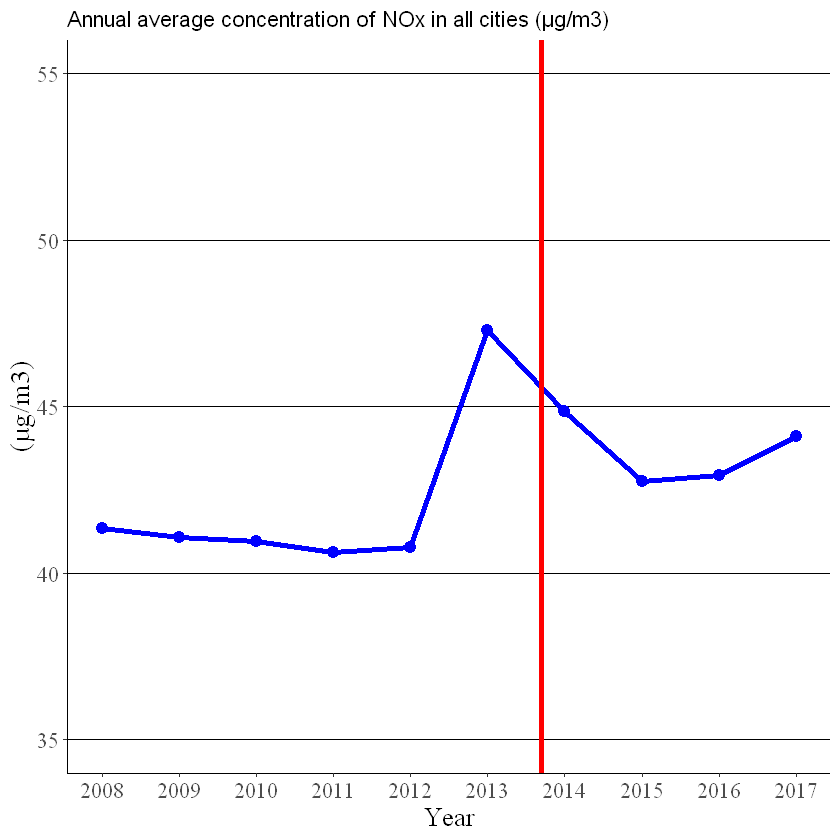

In [39]:
mean_NOx_all <- NULL
for (i in year) {
  subset_year <- subset(df, year == i)
  mean_NOx_all <- c(mean_NOx_all,mean(subset_year$NOx))
}
avg_NOx <- data.frame(year,mean_NOx_all)
p_NOx <- ggplot(data = avg_NOx, aes(x = year)) +
  # add title
  ggtitle("Annual average concentration of NOx in all cities (µg/m3)") +
  # draw line
  geom_line(aes(y = mean_NOx_all), color = "blue", size = 1.5) +
  # draw year point 
  geom_point(aes(x = year, y = mean_NOx_all), color = "blue", size = 3) +
  # scale and breaks
  scale_x_continuous(breaks = seq(2008,2017,1)) +
  scale_y_continuous(breaks = seq(35,55,5), limits = c(35,55)) +
  # modify xlab, y lab, legend
  labs(x = "Year",
       y = "(µg/m3)",
       color = "") +
  # parameter graph
  theme(axis.title = element_text(size = 16, family = "serif"),
        axis.text = element_text(size = 13, family = "serif"),
        axis.line = element_line(color = "black"),
        legend.position = "none",
        panel.grid.major.y = element_line(color = "black"),
        panel.grid.major.x = element_blank(),
        panel.background = element_blank()) +
  # draw line showing the begining of policy
  geom_vline(xintercept = 2013.7, color = "red", size = 1.5)
print(p_NOx)

### Push post forward

Normally, **post** (dummy variable for year) begin to be 1 in 2013. But as we see in the graphs, the policy was began to implement on 10th sept 2013 (the red vertical line) which means that it hardly had an effect on the level of air pollution in 2013. Therefore, we move post forward one year (**post** = 1 begin in 2014) as the policy is likely to take result from 2014.

In [40]:
for (i in 1:nrow(df)) {
  if (df$year[i] == 2013) {
    df$post[i] <- 0
  }
}
for (i in 1:nrow(df_sd)) {
  if (df$year[i] == 2013) {
    df$post[i] <- 0
  }
}

### Statistics decriptive table

In [41]:
stargazer(df_sd, type = "text", 
          title = "Summary statistics of the variables", 
          digits = 2,
          omit = c("year","post","key_regions"),
          omit.summary.stat = c("p25","p75"))


Summary statistics of the variables
Statistic        N     Mean     St. Dev.   Min      Max   
----------------------------------------------------------
PM10            300   99.55      31.88      34      305   
SO2             300   35.85      19.54      5       105   
NOx             300   42.67      11.00      12      68    
pop_density     300   635.20     419.31   130.23 2,294.59 
GRP_pc          300 67,856.42  30,150.49  18,025  185,338 
second_industry 300   42.88       8.93    18.14    60.13  
gas_supply      300 164,753.60 286,819.60 1,966  1,976,114
green_coveraged 300   40.16       5.68    24.20    70.30  
----------------------------------------------------------


### The differences between the result in key regions and no key regions

As we formed our hypothese:

**Ho:** "The more intense policies implemented of key regions are more effective in reducing the air pollution than the less intense policies of others regions"

We should see a bigger reduction in air pollution in key regions than in no key regions. This part calculate those differences.

In [42]:
# Create subset of year and key regions
df_key_2017 <- subset(df, key_regions == 1 & year == 2017)
df_key_2013 <- subset(df, key_regions == 1 & year == 2013)
df_nokey_2017 <- subset(df, key_regions == 0 & year == 2017)
df_nokey_2013 <- subset(df, key_regions == 0 & year == 2013)

# PM10: Ok
key_PM10_2017 <- mean(df_key_2017$PM10)
key_PM10_2013 <- mean(df_key_2013$PM10)
nokey_PM10_2017 <- mean(df_nokey_2017$PM10)
nokey_PM10_2013 <- mean(df_nokey_2013$PM10)
diff_PM10_key <- (key_PM10_2013 - key_PM10_2017)
diff_PM10_nokey <- (nokey_PM10_2013 - nokey_PM10_2017)
did_PM10 <- (diff_PM10_key - diff_PM10_nokey)

#SO2: Ok
key_SO2_2017 <- mean(df_key_2017$SO2)
key_SO2_2013 <- mean(df_key_2013$SO2)
nokey_SO2_2017 <- mean(df_nokey_2017$SO2)
nokey_SO2_2013 <- mean(df_nokey_2013$SO2)
diff_SO2_key <- (key_SO2_2013 - key_SO2_2017)
diff_SO2_nokey <- (nokey_SO2_2013 - nokey_SO2_2017)
did_SO2 <- (diff_SO2_key - diff_SO2_nokey)

#NOx: Ok
key_NOx_2017 <- mean(df_key_2017$NOx)
key_NOx_2013 <- mean(df_key_2013$NOx)
nokey_NOx_2017 <- mean(df_nokey_2017$NOx)
nokey_NOx_2013 <- mean(df_nokey_2013$NOx)
diff_NOx_key <- (key_NOx_2013 - key_NOx_2017)
diff_NOx_nokey <- (nokey_NOx_2013 - nokey_NOx_2017)
did_NOx <- (diff_NOx_key - diff_NOx_nokey)

# Means table for DiD
diff_matrix <- matrix(c(diff_PM10_key,diff_SO2_key,diff_NOx_key,
                        diff_PM10_nokey,diff_SO2_nokey,diff_NOx_nokey,
                        did_PM10,did_SO2,did_NOx),
                      ncol = 3,
                      byrow = TRUE,
                      dimnames = list(c("Key regions","No key regions","Difference"),
                                      c("PM10","SO2","NOx")))
print("Average Reduction of Pollutant Gas")
xtable(diff_matrix, 
       caption = "Average Reduction of Pollutant Gas",
       digits = 2)

[1] "Average Reduction of Pollutant Gas"


,PM10,SO2,NOx
Key regions,50.75000,25.125000,4.375000
No key regions,40.13636,23.318182,2.772727
Difference,10.61364,1.806818,1.602273


**Confirmed** that the reductions in key regions are bigger than no key regions

### Model Diff in Diff 

As we want to test the hypothese **Ho**, we use the model diff in diff to test if the effectiveness of the policy in key regions is significantly different from the effectiveness of the policy in no key regions:

$$\text { ln } \mathrm{Y}_{c t}=\alpha \text{ Post}_{t}+\beta \text{ Key regions}_{c}+\alpha \text{ Post}_{t} \times \text{ Key regions}_{c}+X_{c t}+\gamma_{c}+\gamma_{t}+\epsilon_{c t}$$

${Y}_{c t}$ is the level of concentration of each pollutant gas

- **Model PM10**

In [43]:
model_did_PM10_all <- felm(formula=log(PM10) ~ post *  key_regions + 
                          log(pop_density) + log(GRP_pc) + log(gas_supply) + second_industry + green_coveraged|
                          city + year| 0 |FALSE, data = df, exactDOF=TRUE)
summary(model_did_PM10_all)

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
"the matrix is either rank-deficient or indefinite"Warning message in chol.default(mat, pivot = TRUE, tol = tol):
"the matrix is either rank-deficient or indefinite"


Call:
   felm(formula = log(PM10) ~ post * key_regions + log(pop_density) +      log(GRP_pc) + log(gas_supply) + second_industry + green_coveraged |      city + year | 0 | FALSE, data = df, exactDOF = TRUE) 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32484 -0.07255  0.00485  0.08083  0.51662 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
post1                      NA         NA      NA       NA    
key_regions1               NA         NA      NA       NA    
log(pop_density)    0.4040452  0.1764162   2.290  0.02282 *  
log(GRP_pc)        -0.2690548  0.0798552  -3.369  0.00087 ***
log(gas_supply)     0.0244816  0.0169073   1.448  0.14885    
second_industry    -0.0005093  0.0032734  -0.156  0.87647    
green_coveraged     0.0019430  0.0018343   1.059  0.29048    
post1:key_regions1 -0.1046455  0.0354130  -2.955  0.00342 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.126 on 255 degrees 

- **Model SO2**

In [44]:
model_did_SO2_all <- felm(formula=log(SO2) ~ post *  key_regions + 
                             log(pop_density) + log(GRP_pc) + log(gas_supply) + second_industry + green_coveraged|
                             city + year| 0 |FALSE, data = df, exactDOF=TRUE)
summary(model_did_SO2_all)

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
"the matrix is either rank-deficient or indefinite"Warning message in chol.default(mat, pivot = TRUE, tol = tol):
"the matrix is either rank-deficient or indefinite"


Call:
   felm(formula = log(SO2) ~ post * key_regions + log(pop_density) +      log(GRP_pc) + log(gas_supply) + second_industry + green_coveraged |      city + year | 0 | FALSE, data = df, exactDOF = TRUE) 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72293 -0.16185 -0.00577  0.17181  0.62164 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
post1                     NA         NA      NA       NA    
key_regions1              NA         NA      NA       NA    
log(pop_density)   -0.020164   0.352682  -0.057 0.954451    
log(GRP_pc)        -0.601976   0.159642  -3.771 0.000202 ***
log(gas_supply)     0.030256   0.033800   0.895 0.371554    
second_industry     0.020504   0.006544   3.133 0.001931 ** 
green_coveraged     0.003489   0.003667   0.951 0.342280    
post1:key_regions1 -0.151406   0.070796  -2.139 0.033417 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2518 on 255 degrees of freedo

- **Model NOx**

In [45]:
model_did_NOx_all <- felm(formula=log(NOx) ~ post *  key_regions + 
                             log(pop_density) + log(GRP_pc) + log(gas_supply) + second_industry + green_coveraged|
                             city + year| 0 |FALSE, data = df, exactDOF=TRUE)
summary(model_did_NOx_all)

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
"the matrix is either rank-deficient or indefinite"Warning message in chol.default(mat, pivot = TRUE, tol = tol):
"the matrix is either rank-deficient or indefinite"


Call:
   felm(formula = log(NOx) ~ post * key_regions + log(pop_density) +      log(GRP_pc) + log(gas_supply) + second_industry + green_coveraged |      city + year | 0 | FALSE, data = df, exactDOF = TRUE) 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51761 -0.08120 -0.00518  0.08179  0.50618 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
post1                     NA         NA      NA       NA  
key_regions1              NA         NA      NA       NA  
log(pop_density)   -0.078186   0.214522  -0.364   0.7158  
log(GRP_pc)        -0.112500   0.097104  -1.159   0.2477  
log(gas_supply)     0.030964   0.020559   1.506   0.1333  
second_industry    -0.001218   0.003980  -0.306   0.7599  
green_coveraged     0.004295   0.002230   1.926   0.0553 .
post1:key_regions1 -0.046821   0.043062  -1.087   0.2779  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1532 on 255 degrees of freedom
Multiple R-squar

### Table for regression

In [46]:
stargazer(model_did_PM10_all, model_did_SO2_all, model_did_NOx_all, 
          title = "Difference-in-Differences model with city and year fixed effects",
          type = "text",
          align = TRUE,
          order = c(8,3,4,5,6,7,1,2),
          covariate.labels = c("post*key\\_regions","log(pop\\_density)",
                               "log(GRP\\_pc)","log(gas\\_supply)",
                               "second\\_industry","green\\_coveraged",
                               "post","key\\_regions")
          )


Difference-in-Differences model with city and year fixed effects
                                    Dependent variable:     
                               -----------------------------
                               log(PM10)  log(SO2)  log(NOx)
                                  (1)        (2)      (3)   
------------------------------------------------------------
post*key_regions               -0.105***  -0.151**   -0.047 
                                (0.035)    (0.071)  (0.043) 
                                                            
log(pop_density)                0.404**    -0.020    -0.078 
                                (0.176)    (0.353)  (0.215) 
                                                            
log(GRP_pc)                    -0.269***  -0.602***  -0.113 
                                (0.080)    (0.160)  (0.097) 
                                                            
log(gas_supply)                  0.024      0.030    0.031  
                   

Here we see that for PM10 and SO2, the **post x key regions** is significant and negative
=> **Ho** est accepted for PM10 and SO2

### Robustness test: Parallel trend assumption

We test the parallel trend assumption using model:

$$\text { ln } \mathrm{Y}_{c t}=\sum_{t=2008}^{2017} \beta_{t} \text{ Key regions}_{c} { * } \gamma_{t}+X_{c t}+\delta_{c}+\gamma_{t}+\varepsilon_{c t}$$

**note:** for the theory of parallel trend assumption check the [article](https://drive.google.com/file/d/1sGOhZEliCDLpszyuVlgXfM4Xu_KCB5Q9/view?usp=sharing) of Pischke

In [47]:
robust_PM10 <- felm(formula=log(PM10) ~ year *  key_regions + 
                      log(pop_density) + log(GRP_pc) + log(gas_supply) + second_industry + green_coveraged|
                      city + year| 0 |FALSE, data = df, exactDOF=TRUE)
robust_SO2 <- felm(formula=log(SO2) ~ year *  key_regions + 
                      log(pop_density) + log(GRP_pc) + log(gas_supply) + second_industry + green_coveraged|
                      city + year| 0 |FALSE, data = df, exactDOF=TRUE)
key_year <- c("key_2008","key_2009","key_2010","key_2011","key_2012","key_2013","key_2014","key_2015","key_2016","key_2017")

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
"the matrix is either rank-deficient or indefinite"Warning message in chol.default(mat, pivot = TRUE, tol = tol):
"the matrix is either rank-deficient or indefinite"

- **Graph of Robust test for PM10**: with the 90% confidence interval

Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_errorbar)."

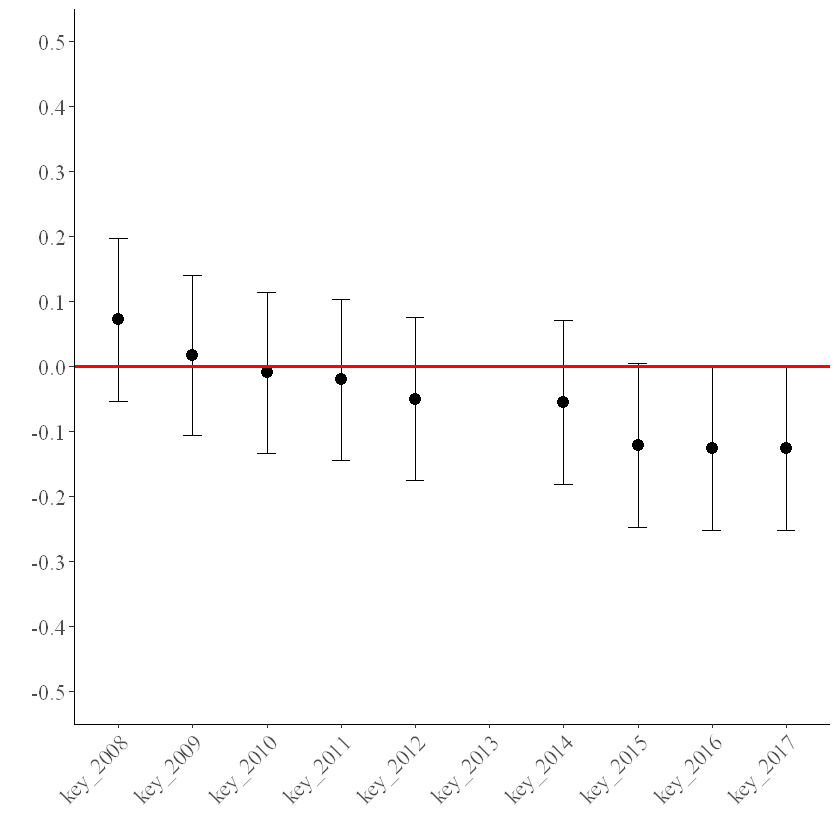

In [48]:
### Get confidence interval and coef of key_year
confint_PM10 <- confint(robust_PM10, level = 0.9)
for (i in 1:15){
  confint_PM10 <- confint_PM10[-1,]
}

coef_robust_PM10 <- NULL
for (i in 16:24){
  coef_robust_PM10 <- c(coef_robust_PM10,robust_PM10$coefficients[i])
}
coef_robust_PM10 <- data.frame(coef_robust_PM10)

df_robust_PM10 <- data.frame(confint_PM10,coef_robust_PM10)
dt_robust_PM10 <- data.table(df_robust_PM10)
dt_robust_PM10 <- rbindlist(list(dt_robust_PM10[1:5, ], as.list(c(NA,NA,NA)), dt_robust_PM10[6:9, ]))
df_robust_PM10 <- data.frame(key_year,dt_robust_PM10)
colnames(df_robust_PM10) <- c("key_year","x5","x95","coef")

### Draw robust test graph
ggplot(df_robust_PM10, aes(x = key_year, y = coef)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = x5, ymax = x95), width = 0.25) +
  scale_y_continuous(breaks = seq(-0.5,0.5,0.1), limits = c(-0.5,0.5)) +
  labs(x = "",
       y = "") +
  # parameter graph
  theme(axis.text.x = element_text(size = 13, family = "serif", angle = 45, hjust = 1),
        axis.text.y = element_text(size = 13, family = "serif"),
        axis.line = element_line(color = "black"),
        legend.position = "none",
        panel.grid.major.y = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.background = element_blank()) +
  # draw line showing the begining of policy
  geom_hline(yintercept = 0, color = "red", size = 1)

Coef is not significant before 2013 and become more and more significant after 2013 => **model is robust**

- **Graph of Robust test for SO2**: with the 90% confidence interval

Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_errorbar)."

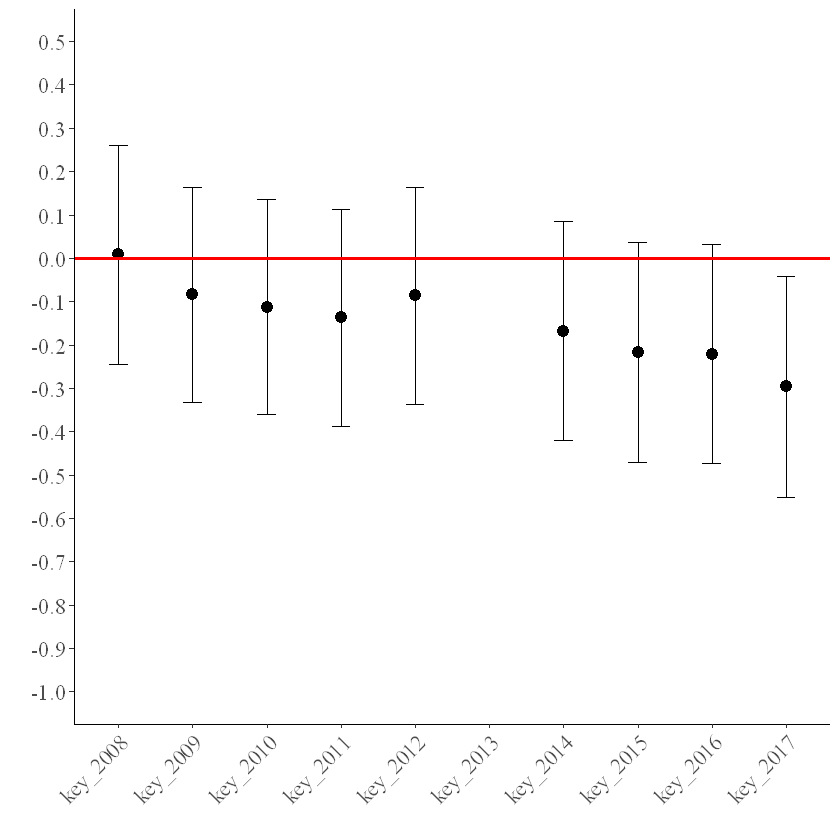

In [49]:
confint_SO2 <- confint(robust_SO2, level = 0.9)
for (i in 1:15){
  confint_SO2 <- confint_SO2[-1,]
}

coef_robust_SO2 <- NULL
for (i in 16:24){
  coef_robust_SO2 <- c(coef_robust_SO2,robust_SO2$coefficients[i])
}
coef_robust_SO2 <- data.frame(coef_robust_SO2)

df_robust_SO2 <- data.frame(confint_SO2,coef_robust_SO2)
dt_robust_SO2 <- data.table(df_robust_SO2)
dt_robust_SO2 <- rbindlist(list(dt_robust_SO2[1:5, ], as.list(c(NA,NA,NA)), dt_robust_SO2[6:9, ]))
df_robust_SO2 <- data.frame(key_year,dt_robust_SO2)
colnames(df_robust_SO2) <- c("key_year","x5","x95","coef")

### Draw robust test graph
ggplot(df_robust_SO2, aes(x = key_year, y = coef)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = x5, ymax = x95), width = 0.25) +
  scale_y_continuous(breaks = seq(-1,0.5,0.1), limits = c(-1,0.5)) +
  labs(x = "",
       y = "") +
  # parameter graph
  theme(axis.text.x = element_text(size = 13, family = "serif", angle = 45, hjust = 1),
        axis.text.y = element_text(size = 13, family = "serif"),
        axis.line = element_line(color = "black"),
        legend.position = "none",
        panel.grid.major.y = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.background = element_blank()) +
  # draw line showing the begining of policy
  geom_hline(yintercept = 0, color = "red", size = 1)

Coef is not significant before 2013 and become more and more significant after 2013 => **model is robust**